In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [37]:
ocean_discord = pd.read_csv('data/oceandiscord.csv')
ocean_discord.head(5)

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1)
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1)
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1)


In [38]:
ocean_discord['Date'] = pd.to_datetime(ocean_discord['Date'])
ocean_discord['message_count'] = 1

print(f'The dataset has the following shape{ocean_discord.shape}')
ocean_discord.info()

The dataset has the following shape(84754, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Channel        84754 non-null  object        
 1   AuthorID       84754 non-null  int64         
 2   Author         84754 non-null  object        
 3   Date           84754 non-null  datetime64[ns]
 4   Content        64609 non-null  object        
 5   Attachments    1959 non-null   object        
 6   Reactions      6073 non-null   object        
 7   message_count  84754 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 5.2+ MB


In [39]:
ocean_discord.Date.min(), ocean_discord.Date.max()

(Timestamp('2019-08-20 19:55:00'), Timestamp('2024-02-20 18:04:00'))

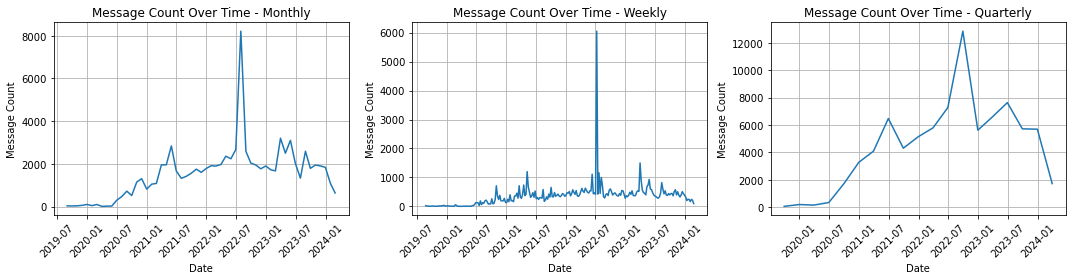

In [44]:
df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='M')]).size().reset_index(name='Message_Count')
df_weekly = ocean_discord.groupby([pd.Grouper(key='Date', freq='W')]).size().reset_index(name='Message_Count')
df_quarterly = ocean_discord.groupby([pd.Grouper(key='Date', freq='Q')]).size().reset_index(name='Message_Count')


temporal_dfs = [df_monthly, df_weekly, df_quarterly]
temporal_labels = ['Monthly', 'Weekly', 'Quarterly']

# Calculate number of subplots needed
num_channels = len(temporal_dfs)
num_rows = (num_channels + 2) // 3  # Ensure we have enough rows for all channels

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))  # Adjust figsize as needed


# Plotting line chart for each case
for idx, df in enumerate(temporal_dfs):
    row = idx // 3
    col = idx % 3
    ax = axes[col]
    
    # Filter data for current channel
    dates = df['Date'].to_numpy()  # Convert Date column to numpy array
    message_counts = df['Message_Count'].to_numpy()  
    
    ax.plot(dates, message_counts)
    ax.set_title(f'Message Count Over Time - {temporal_labels[col]}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Message Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

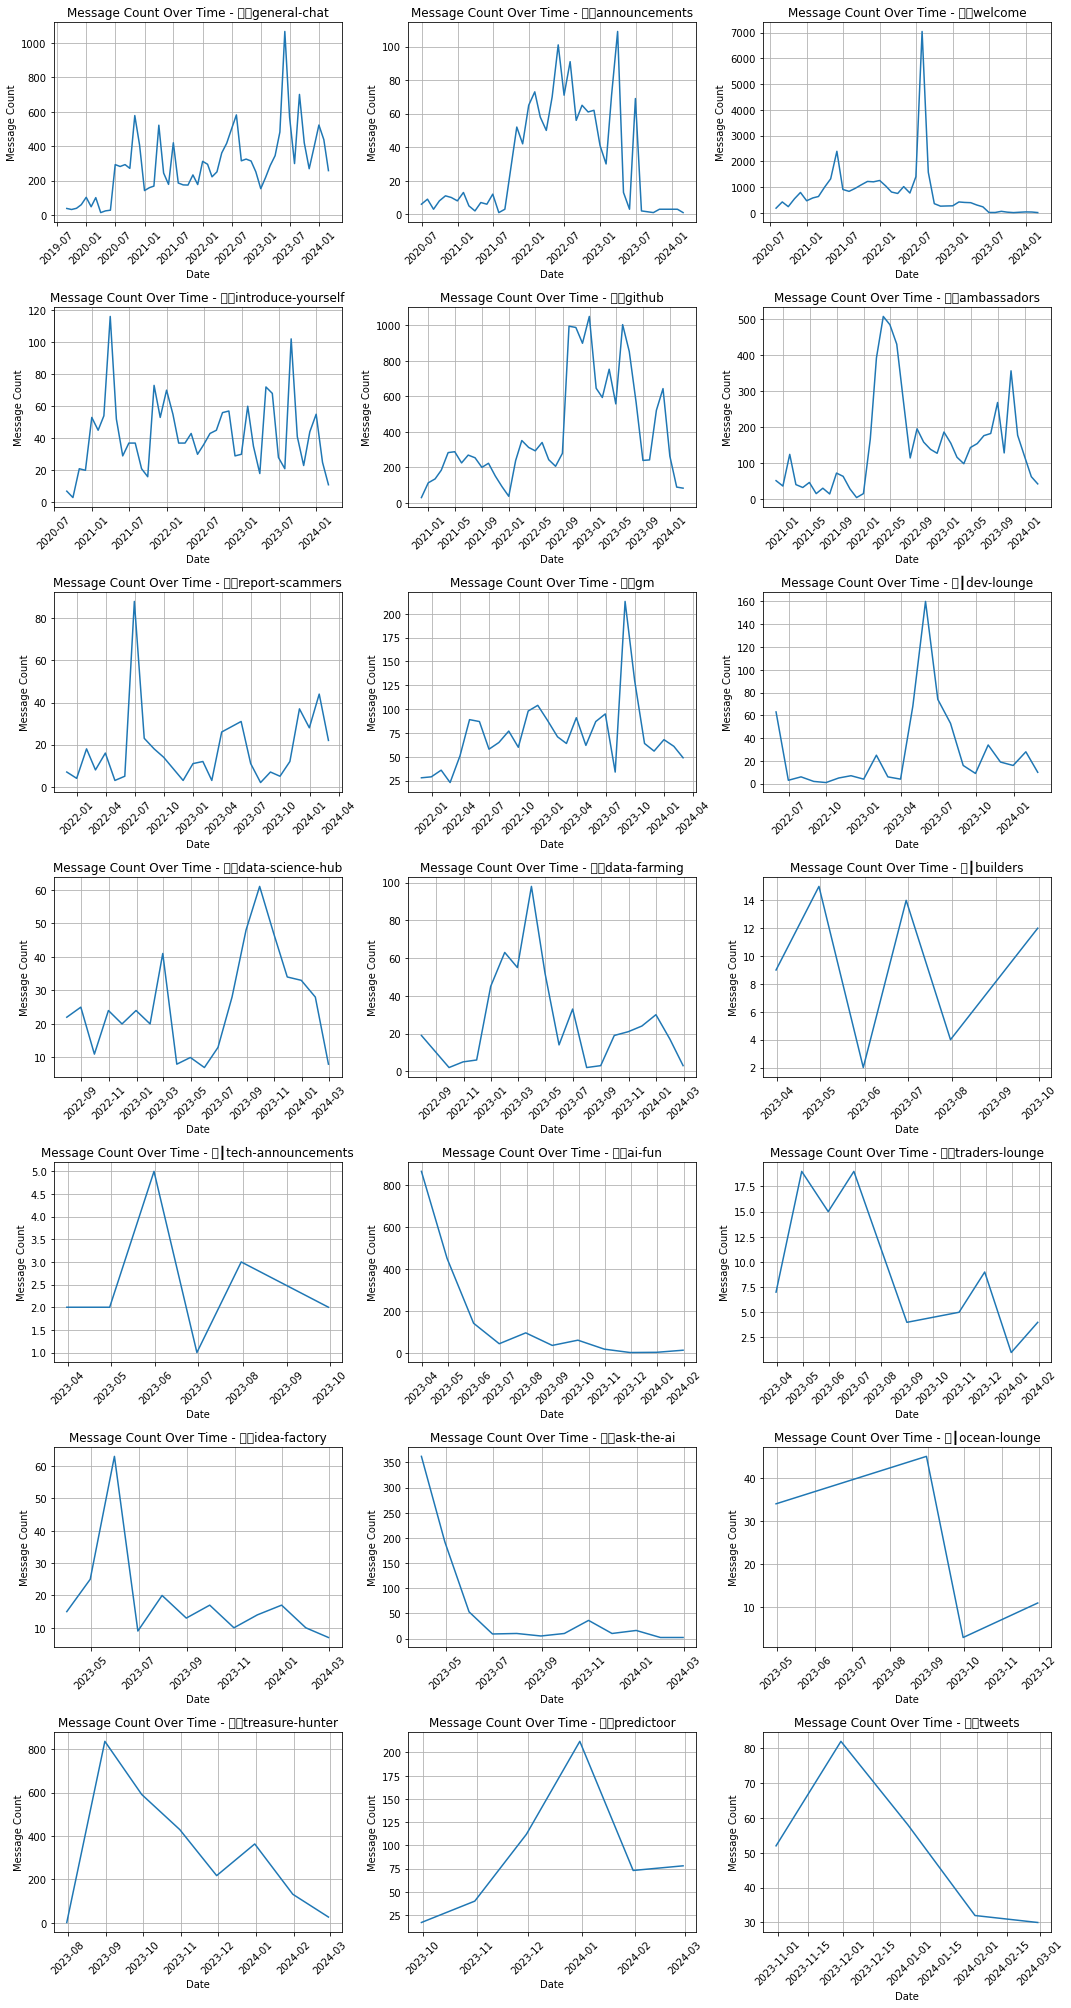

In [40]:
df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='M'), 'Channel']).size().reset_index(name='Message_Count')
channels = df_monthly['Channel'].unique()

# Calculate number of subplots needed
num_channels = len(channels)
num_rows = (num_channels + 2) // 3  # Ensure we have enough rows for all channels

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))  # Adjust figsize as needed

# Plotting line chart for each channel
for idx, channel in enumerate(channels):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Filter data for current channel
    channel_data = df_monthly[df_monthly['Channel'] == channel]
    dates = channel_data['Date'].to_numpy()  # Convert Date column to numpy array
    message_counts = channel_data['Message_Count'].to_numpy()  
    channel = channel.split(' ')[-2]
    ax.plot(dates, message_counts)
    ax.set_title(f'Message Count Over Time - {channel}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Message Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

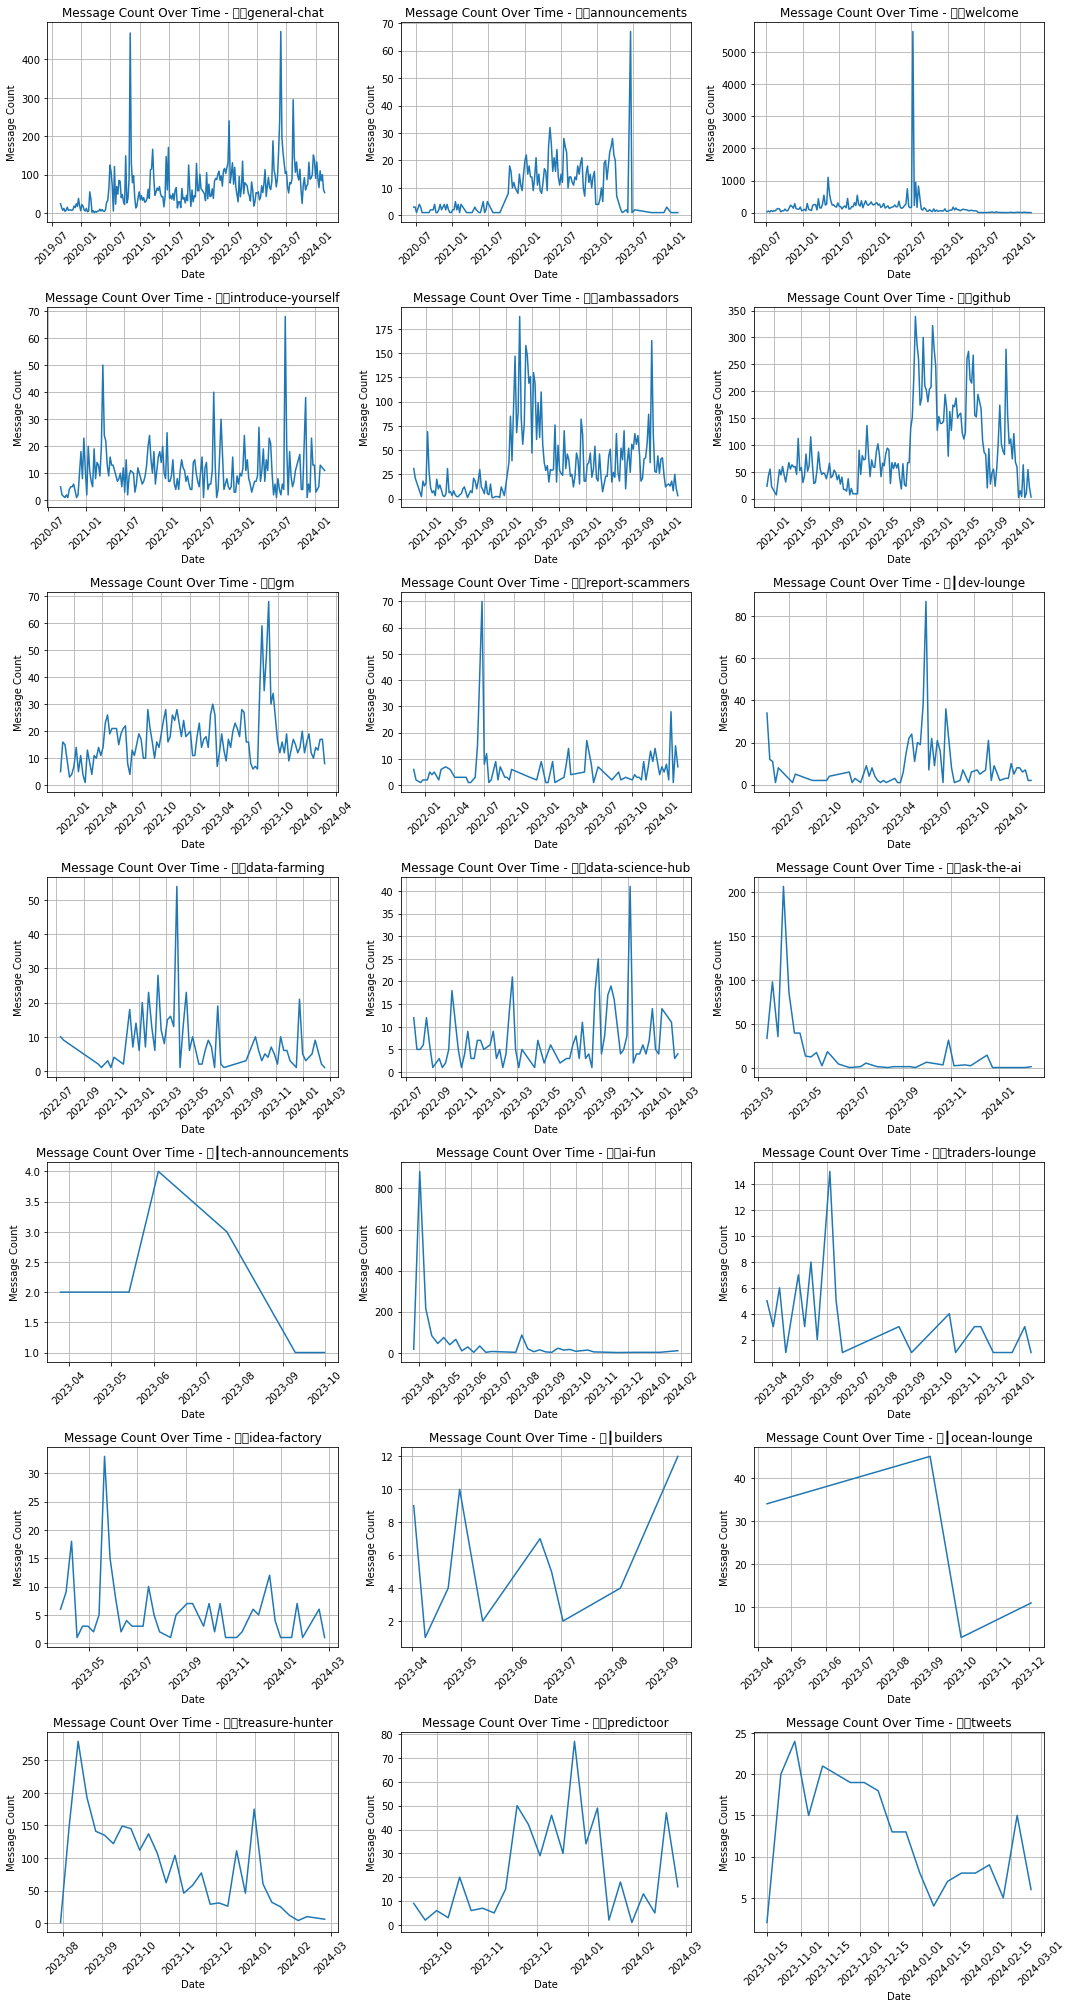

In [34]:
#Weekly
df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='W'), 'Channel']).size().reset_index(name='Message_Count')
channels = df_monthly['Channel'].unique()

# Calculate number of subplots needed
num_channels = len(channels)
num_rows = (num_channels + 2) // 3  # Ensure we have enough rows for all channels

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))  # Adjust figsize as needed

# Plotting line chart for each channel
for idx, channel in enumerate(channels):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Filter data for current channel
    channel_data = df_monthly[df_monthly['Channel'] == channel]
    dates = channel_data['Date'].to_numpy()  # Convert Date column to numpy array
    message_counts = channel_data['Message_Count'].to_numpy()  
    channel = channel.split(' ')[-2]
    ax.plot(dates, message_counts)
    ax.set_title(f'Message Count Over Time - {channel}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Message Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

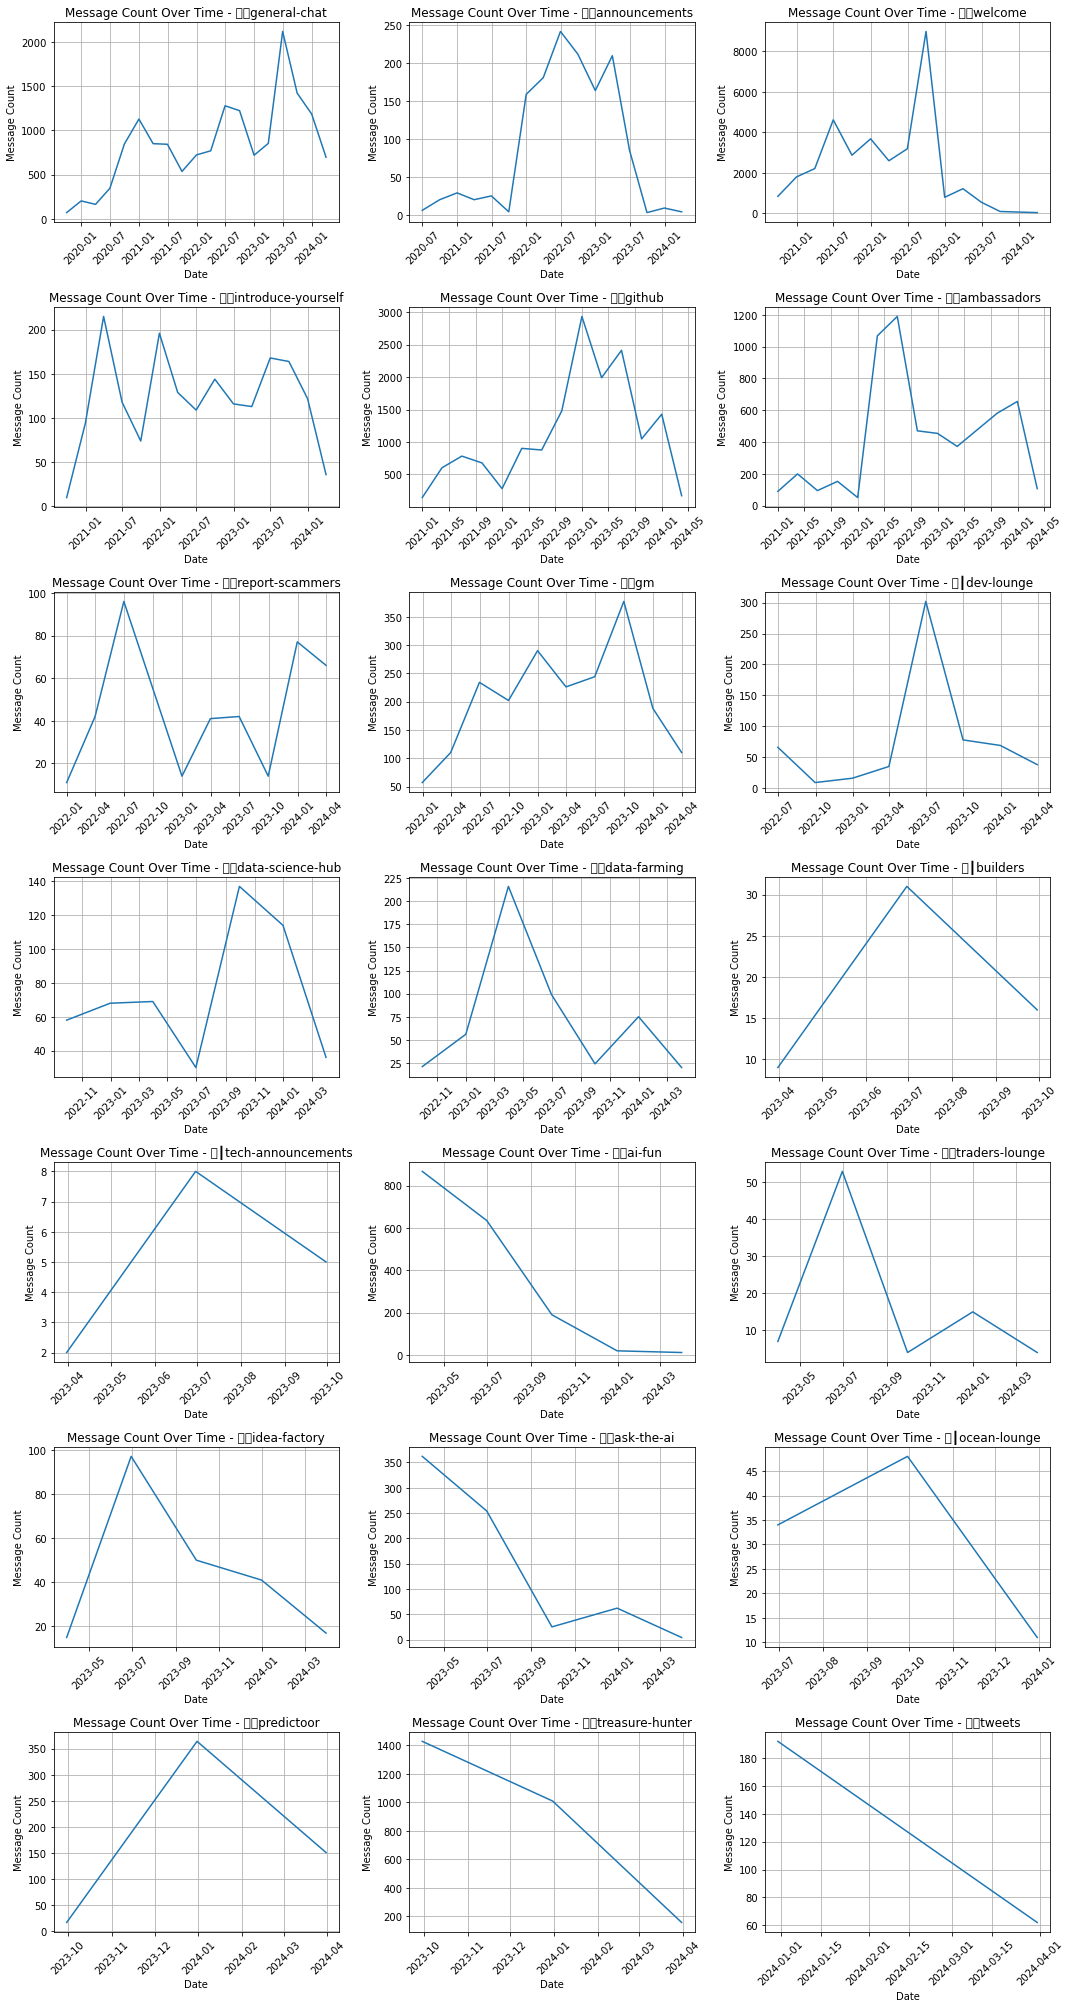

In [35]:
# Quarterly
df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='Q'), 'Channel']).size().reset_index(name='Message_Count')
channels = df_monthly['Channel'].unique()

# Calculate number of subplots needed
num_channels = len(channels)
num_rows = (num_channels + 2) // 3  # Ensure we have enough rows for all channels

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))  # Adjust figsize as needed

# Plotting line chart for each channel
for idx, channel in enumerate(channels):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Filter data for current channel
    channel_data = df_monthly[df_monthly['Channel'] == channel]
    dates = channel_data['Date'].to_numpy()  # Convert Date column to numpy array
    message_counts = channel_data['Message_Count'].to_numpy()  
    channel = channel.split(' ')[-2]
    ax.plot(dates, message_counts)
    ax.set_title(f'Message Count Over Time - {channel}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Message Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [54]:
# Identify potential outliers by channel
df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='M'), 'Channel']).size().reset_index(name='Message_Count')
outliers = df_monthly[df_monthly['Message_Count'] > df_monthly.groupby('Channel')['Message_Count'].transform(lambda x: x.mean() + 2 * x.std())]
print("Potential outlier periods by channel:")
outliers.sort_values('Message_Count', ascending=False)


Potential outlier periods by channel:


,Date,Channel,Message_Count
173,2022-07-31,Ocean Protocol - GET STARTED - 👋︱welcome [7278...,7044
295,2023-05-31,Ocean Protocol - GENERAL - 💭︱general-chat [612...,1067
217,2022-12-31,Ocean Protocol - CORE-TECH - 🛳︱github [7739269...,1049
286,2023-05-31,Ocean Protocol - CORE-TECH - 🛳︱github [7739269...,1003
185,2022-09-30,Ocean Protocol - CORE-TECH - 🛳︱github [7739269...,994
253,2023-03-31,Ocean Protocol - ECOSYSTEM - 🎨︱ai-fun [1088460...,867
344,2023-08-31,Ocean Protocol - GENERAL - 💭︱general-chat [612...,701
131,2022-03-31,Ocean Protocol - ECOSYSTEM - 🪢︱ambassadors [76...,508
139,2022-04-30,Ocean Protocol - ECOSYSTEM - 🪢︱ambassadors [76...,485
148,2022-05-31,Ocean Protocol - ECOSYSTEM - 🪢︱ambassadors [76...,431


In [ ]:
# The most surprising value is on July 2022, that acording to this medium post it could be related to the Ocean Data Challenge program initiative that was launched that month.
# https://blog.oceanprotocol.com/introducing-the-ocean-data-bounty-7eb1e3bf3c0a